In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\soconnell\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(10)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


# Select your features (columns)

In [7]:
# # Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 
                        'koi_prad','koi_teq', 'koi_insol',]]

In [ ]:
'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

In [3]:
X = df.drop(["koi_disposition"], axis=1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [9]:
shaped_y = encoded_y.reshape(-1,1)

In [25]:
shaped_y.shape

(6991, 1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824
k: 21, Train/Test Score: 0.839/0.823
k: 23, Train/Test Score: 0.840/0.826
k: 25, Train/Test Score: 0.837/0.824
k: 27, Train/Test Score: 0.836/0.822
k: 29, Train/Test Score: 0.835/0.824
k: 31, Train/Test Score: 0.834/0.820
k: 33, Train/Test Score: 0.835/0.827
k: 35, Train/Test Score: 0.833/0.826
k: 37, Train/Test Score: 0.834/0.822
k: 39, Train/Test Score: 0.833/0.824
k: 41, Train/Test Score: 0.832/0.823
k: 43, Train/Test Score: 0.830/0.823
k: 45, Train/Test Score: 0.828/0.824
k: 47, Train/Test Score: 0.829/0.824
k: 49, Train/Test Score: 0.829/0.825
k: 51, Train/Test Score: 0.828/0.825
k: 53, Train/Test Score: 0.828/0.824
k: 55,

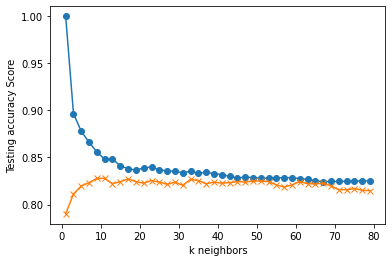

In [12]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 81, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 81, 2), train_scores, marker='o')
plt.plot(range(1, 81, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=67)
knn.fit(X_train_scaled, y_train)
print('k=67 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=67 Test Acc: 0.823


In [14]:
#new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict(X_test_scaled)
print(predicted_class)

['FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE' ... 'CONFIRMED' 'CANDIDATE'
 'CONFIRMED']


In [16]:
predictions = knn.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:20]}")
print(f"First 10 Actual labels: {y_test[:20].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' 'CONFIRMED' 'CANDIDATE'
 'FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' 'CONFIRMED' 'FALSE POSITIVE'
 'CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED']
First 10 Actual labels: ['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED']


In [17]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,CANDIDATE,CANDIDATE
1744,CANDIDATE,CANDIDATE
1745,CONFIRMED,CONFIRMED
1746,CANDIDATE,CONFIRMED


# Train the Model



In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train, y_train_categorical)

LinearRegression()

In [22]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train_categorical)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_categorical)}")

Training Data Score: -0.40853779581187316
Testing Data Score: -0.36632161331710034


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 11,303
Trainable params: 11,303
Non-trainable params: 0
_________________________________________________________________


In [27]:
# model.fit(
#     X_train_scaled,
#     y_train_categorical,
#     epochs=60,
#     shuffle=True,
#     verbose=2
# )

In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 1.0976 - accuracy: 0.3112
Normal Neural Network - Loss: 1.0975991487503052, Accuracy: 0.31121280789375305


In [29]:
encoded_predictions = model.predict_classes(X_test_scaled[:15])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:15])}")

Predicted classes: [0 0 2 1 2 2 2 0 0 0 2 2 2 1 0]
Actual Labels: [array([2]), array([0]), array([2]), array([2]), array([2]), array([1]), array([0]), array([0]), array([0]), array([2]), array([1]), array([1]), array([1]), array([2]), array([0])]


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [39]:
# Support vector machine linear classifier
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')

In [31]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [32]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001E551212130> does not.

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)